In [2]:
# !pip install transformers datasets torch scikit-learn matplotlib

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Load CSV file (only required columns)
csv_path = "news_dataset.csv"  # path to your csv file
df = pd.read_csv(csv_path, usecols=['category', 'articles'])
# get only 20% of the dataset for each category
df = df.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))
print(len(df))
# Create label map from unique categories
classes = df['category'].unique().tolist()
label_map = {cls: idx for idx, cls in enumerate(classes)}

# Prepare data and labels
data = df['articles'].tolist()
labels = [label_map[cat] for cat in df['category']]

# Dataset class
class TextDataset(Dataset):
    def __init__(self, data, labels, tokenizer, max_length):
        self.data = data
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Example usage:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
# dataset = TextDataset(data, labels, tokenizer, max_length=128)

4845


In [14]:
!pip install --upgrade transformers
from transformers import AutoTokenizer
# Load tokenizer
# tokenizer = BertTokenizer.from_pretrained("tahrirchi/tahrirchi-bert-base")
tokenizer = AutoTokenizer.from_pretrained("tahrirchi/tahrirchi-bert-small", force_download=True)

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:01, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

In [15]:
# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create datasets
train_dataset = TextDataset(train_texts, train_labels, tokenizer, max_length=256)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, max_length=256)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at tahrirchi/tahrirchi-bert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\E-MaxPCShop\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\module.py:1541: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


epoch= 0
485
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 1

2 420
2 421
2 422
2 423
2 424
2 425
2 426
2 427
2 428
2 429
2 430
2 431
2 432
2 433
2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
Eval starting...
Epoch 3, Training Loss: 0.1656, Validation Loss: 0.5308
epoch= 3
485
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 

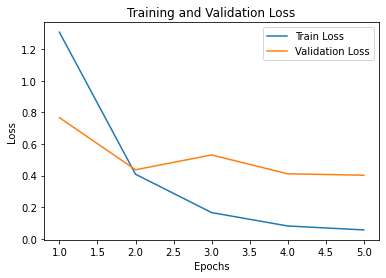

In [16]:
# Load model
model = BertForSequenceClassification.from_pretrained("tahrirchi/tahrirchi-bert-base", num_labels=len(classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training setup
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
epochs = 5

train_losses, val_losses = [], []

for epoch in range(epochs):
    print("epoch=", epoch)
    print(len(train_loader))
    model.train()
    total_loss = 0
    batchn=0
    for batch in train_loader:
        batchn+=1
        print(epoch, batchn)
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))
    
    # Validation
    print("Eval starting...")
    model.eval()
    val_loss = 0
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch + 1}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

# Evaluation
accuracy = accuracy_score(true_labels, preds)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, preds, target_names=classes))

# Plot losses
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()